In [1]:
import pickle
from data_processing_transformers import (
    DatasetFromListTransformer,
    MapAndTokenizeTransformer,
    ReverseTokenizationTransformer,
)
from functions import split_text_to_words_in_sentences, predict_pre_train_model, calculate_metrics
from transformers import AutoTokenizer, AutoModelForTokenClassification
from safetensors.torch import load_file
import torch
import pandas as pd
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


/Users/guybasson/works_assigments/sleek_ml_engineer/env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/guybasson/works_assigments/sleek_ml_engineer/env/lib/python3.10/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


In [2]:
model_index = None

In [3]:
# Prepare the input example
input_test_example = '''We observed DDKONG in use between February 2017 and the present, while PLAINTEE is a newer addition with the earliest known sample being observed in October 2017. The RANCOR campaign represents a continued trend of targeted attacks against entities within the South East Asia region.'''



In [4]:

sentences = split_text_to_words_in_sentences(input_test_example)

In [5]:
if model_index == None:
    # fnd the largest model index in the models directory
    import os
    model_index = 0
    for file in os.listdir("models/securebert_ner"):
        if file.startswith("model_"):
            index = int(file.split("_")[1])
            if index > model_index:
                model_index = index
    print("Largest model index found: ", model_index)

Largest model index found:  3


In [6]:
# Load the pipeline_from_predictions_to_labels
with open('pipelines/pipeline_from_predictions_to_labels.pkl', 'rb') as file:
    pipeline_from_predictions_to_labels = pickle.load(file)

# Load the pipeline_from_organized_data_to_lentokenized_data
with open('pipelines/pipeline_from_organized_data_to_lentokenized_data.pkl', 'rb') as file:
    pipeline_from_organized_data_to_lentokenized_data = pickle.load(file)

# Load the pipeline_from_input_to_lentokenized_data
with open('pipelines/pipeline_from_input_to_lentokenized_data.pkl', 'rb') as file:
    pipeline_from_input_to_lentokenized_data = pickle.load(file)

In [7]:

# Tokenize the input example
tokenized_input_example = pipeline_from_input_to_lentokenized_data.transform(input_test_example)

Map: 100%|██████████| 2/2 [00:00<00:00, 79.44 examples/s]


In [8]:
# load model
model_dir = "models/securebert_ner/model_" + str(model_index) 


model = AutoModelForTokenClassification.from_pretrained(model_dir)
model.eval()


RobertaForTokenClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
            

In [9]:
model

RobertaForTokenClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
            

In [10]:
predict_labels = predict_pre_train_model(tokenized_input_example, model, pipeline_from_predictions_to_labels)

In [11]:
sentences

[{'tokens': ['We',
   'observed',
   'DDKONG',
   'in',
   'use',
   'between',
   'February',
   '2017',
   'and',
   'the',
   'present,',
   'while',
   'PLAINTEE',
   'is',
   'a',
   'newer',
   'addition',
   'with',
   'the',
   'earliest',
   'known',
   'sample',
   'being',
   'observed',
   'in',
   'October',
   '2017.'],
  'labels': ['-100',
   '-100',
   '-100',
   '-100',
   '-100',
   '-100',
   '-100',
   '-100',
   '-100',
   '-100',
   '-100',
   '-100',
   '-100',
   '-100',
   '-100',
   '-100',
   '-100',
   '-100',
   '-100',
   '-100',
   '-100',
   '-100',
   '-100',
   '-100',
   '-100',
   '-100',
   '-100']},
 {'tokens': ['The',
   'RANCOR',
   'campaign',
   'represents',
   'a',
   'continued',
   'trend',
   'of',
   'targeted',
   'attacks',
   'against',
   'entities',
   'within',
   'the',
   'South',
   'East',
   'Asia',
   'region.'],
  'labels': ['-100',
   '-100',
   '-100',
   '-100',
   '-100',
   '-100',
   '-100',
   '-100',
   '-100',
   '-1

In [12]:
# generate df with colmns word and predicted_label
df = pd.DataFrame()
# words are list from input_test_example split by space and '
for i in range(len(sentences)):
    
    tokens = sentences[i]['tokens']
    len_of_tokens = len(tokens)
    predict_labels = predict_labels[i][:len_of_tokens]
    
    
    # do concat
    temp_df = pd.DataFrame({'word': tokens, 'predicted_label': predict_labels})
    df = pd.concat([df, temp_df])
    # make space between sentences
    df = pd.concat([df, pd.DataFrame({'word': ['-----'], 'predicted_label': ['----']})])

In [13]:
df

,word,predicted_label
0,We,O
1,observed,O
2,DDKONG,O
3,in,B-Time
4,use,B-Time
5,between,B-Time
6,February,O
7,2017,O
8,and,O
9,the,O


In [14]:
test_file_path = 'datasets/test.txt'
val_file_path = 'datasets/valid.txt'
train_file_path = 'datasets/train.txt'

# make val_raw_data and test_raw_data
with open(test_file_path, "r", encoding="utf-8") as file:
    test_raw_data = file.read()

with open(val_file_path, "r", encoding="utf-8") as file:
    val_raw_data = file.read()

with open(train_file_path, "r", encoding="utf-8") as file:
    train_raw_data = file.read()


In [15]:

# delete the file
tokenized_input_example = pipeline_from_organized_data_to_lentokenized_data.transform(test_raw_data)
print("len(tokenized_input_example)", len(tokenized_input_example))
# Get model predictions

Map: 100%|██████████| 664/664 [00:00<00:00, 4456.53 examples/s]

len(tokenized_input_example) 664


In [16]:
import torch

# Check if MPS is available
if torch.backends.mps.is_available():
    device = torch.device("mps")
    print("Using MPS device")
else:
    device = torch.device("cpu")
    print("Using CPU device")

Using MPS device


In [17]:
predict_labels = predict_pre_train_model(tokenized_input_example, model, pipeline_from_predictions_to_labels, device=device)

In [18]:
with open('map_tokens.json', 'r') as file:
    map_token = json.load(file)

reversed_map_token = {v: k for k, v in map_token.items()}    

In [19]:
precision, recall, y_true, y_pred = calculate_metrics(tokenized_input_example, predict_labels, reversed_map_token)

In [20]:

print("precision", precision)
print("recall", recall)

precision 0.6414556227167305
recall 0.6286972228494017


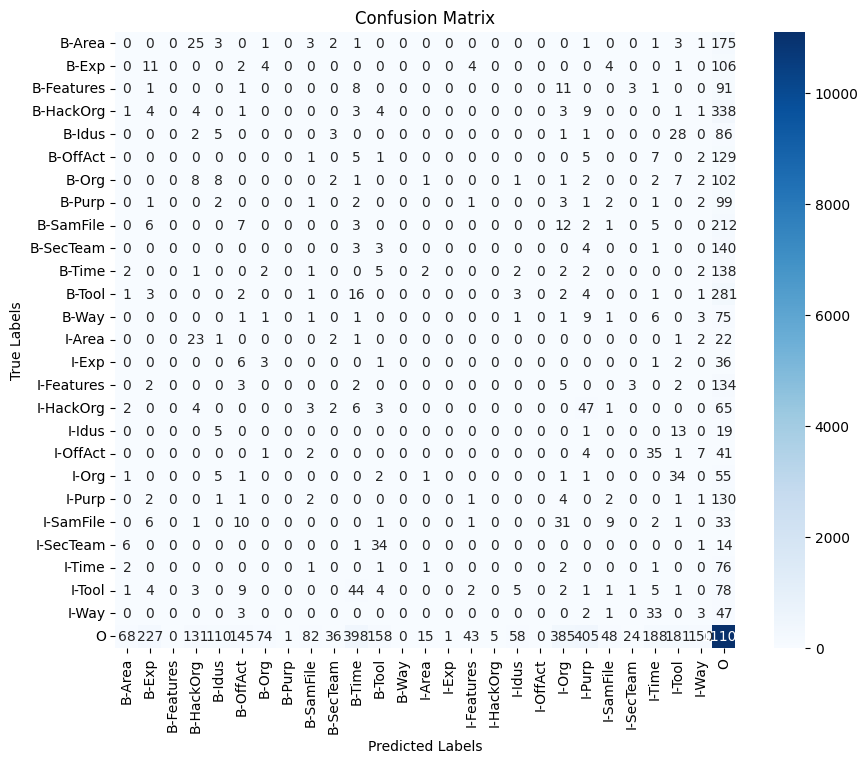

In [21]:
# i want confusion matrix

y_true = np.array(y_true)
y_pred = np.array(y_pred)
labels = np.unique(y_true)




# Generate the confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred, labels=labels)

# Set the figure size
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set the labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


